In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [ ]:

file_path = 'dataset.csv'
data = pd.read_csv(file_path)
data


work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
0                EUR   88000          95012            Germany   
1                USD  186000         186000      United States   
2                USD   81800          81800      United States   
3                USD  212000         212000      United States   
4                USD   93300          93300      United States   
...              ...     ...            ...                ...   
9350             USD  165000         165000      United States   
9351             USD  412000         412000      United States   
9352             USD  151000         151000      United States   
9353             USD  105000         105000      United States   
9354             USD  100000         100000      United States   

     experience_level employment_type work_setting company_location  \
0           Mid-level       Full-time       Hybrid          Germany   
1              Senior       Full-time    In-person    United States   
2              Senior       Full-time    In-person    United States   
3              Senior       Full-time    In-person    United States   
4              Senior       Full-time    In-person    United States   
...               ...             ...          ...              ...   
9350           Senior       Full-time       Remote    United States   
9351           Senior       Full-time       Remote    United States   
9352        Mid-level       Full-time       Remote    United States   
9353      Entry-level       Full-time       Remote    United States   
9354      Entry-level        Contract       Remote    United States   

     company_size  
0               L  
1               M  
2               M  
3               M  
4               M  
...           ...  
9350            L  
9351            L  
9352            L  
9353            S  
9354            L  

[9355 rows x 12 columns]

In [ ]:
#checking for null values in the entire dataset
null_values = data.isnull().sum()


print(null_values)

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [ ]:
#checking for empty values in the entire dataset
empty_values = (data == '').sum()

print(empty_values)

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [ ]:

unique_values_per_column = {}

#iterating over each column in dataset
for column in data.columns:
    #getting unique values
    unique_values = data[column].unique()
    #storing the unique values
    unique_values_per_column[column] = unique_values

#displaying unique valuesw
for column, unique_values in unique_values_per_column.items():
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'work_year': [2023 2022 2020 2021]
Unique values in column 'job_title': ['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Rese

In [ ]:
#finding the unique values
data.company_location.unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Netherlands',
       'Luxembourg', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'India',
       'Latvia', 'Mauritius', 'Russia', 'Italy', 'South Korea', 'Estonia',
       'Czech Republic', 'Brazil', 'Qatar', 'Kenya', 'Denmark', 'Ghana',
       'Sweden', 'Turkey', 'Switzerland', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Japan',
       'Central African Republic', 'Finland', 'Singapore', 'Croatia',
       'Armenia', 'Bosnia and Herzegovina', 'Pakistan', 'Iran', 'Bahamas',
       'Austria', 'Puerto Rico', 'American Samoa', 'Thailand',
       'Philippines', 'Belgium', 'Egypt', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria', 'Iraq',
       'China', 'New Zealand', 'Moldova', 'Malta'], dtype=object)

In [ ]:
# filtering data where the company's location is "US"

data_us = data.loc[data['company_location'] == 'United States']

print(data_us)


      work_year                 job_title                    job_category  \
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
5          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
1        

In [ ]:
data_us

work_year                 job_title                    job_category  \
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
5          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
1                USD  186000         186000      United States   
2                USD   81800          81800      United States   
3                USD  212000         212000      United States   
4                USD   93300          93300      United States   
5                USD  130000         130000      United States   
...              ...     ...            ...                ...   
9350             USD  165000         165000      United States   
9351             USD  412000         412000      United States   
9352             USD  151000         151000      United States   
9353             USD  105000         105000      United States   
9354             USD  100000         100000      United States   

     experience_level employment_type work_setting company_location  \
1              Senior       Full-time    In-person    United States   
2              Senior       Full-time    In-person    United States   
3              Senior       Full-time    In-person    United States   
4              Senior       Full-time    In-person    United States   
5              Senior       Full-time       Remote    United States   
...               ...             ...          ...              ...   
9350           Senior       Full-time       Remote    United States   
9351           Senior       Full-time       Remote    United States   
9352        Mid-level       Full-time       Remote    United States   
9353      Entry-level       Full-time       Remote    United States   
9354      Entry-level        Contract       Remote    United States   

     company_size  
1               M  
2               M  
3               M  
4               M  
5               M  
...           ...  
9350            L  
9351            L  
9352            L  
9353            S  
9354            L  

[8132 rows x 12 columns]

In [ ]:
#total occurance of each job title

job_counts = data_us['job_title'].value_counts()

print("Total occurrence of each job category:")
pd.set_option('display.max_rows', None)

print(job_counts)

pd.reset_option('display.max_rows')

Total occurrence of each job category:
job_title
Data Engineer                               1937
Data Scientist                              1720
Data Analyst                                1219
Machine Learning Engineer                    869
Applied Scientist                            271
Research Scientist                           244
Analytics Engineer                           224
Data Architect                               199
Business Intelligence Engineer               140
Research Engineer                            131
Data Manager                                 122
ML Engineer                                   99
Data Science Manager                          82
Machine Learning Scientist                    62
Business Intelligence Analyst                 48
BI Developer                                  47
Data Specialist                               40
Data Analytics Manager                        37
Decision Scientist                            36
Research Analyst    

In [ ]:
#total occurance of each job category

job_counts = data_us['job_category'].value_counts()

print("Total occurrence of each job category:")
pd.set_option('display.max_rows', None)

print(job_counts)

pd.reset_option('display.max_rows')

Total occurrence of each job category:
job_category
Data Science and Research         2635
Data Engineering                  1977
Data Analysis                     1252
Machine Learning and AI           1190
Leadership and Management          442
BI and Visualization               288
Data Architecture and Modeling     237
Data Management and Strategy        56
Data Quality and Operations         50
Cloud and Database                   5
Name: count, dtype: int64


In [ ]:
#job titles and their occurances in the new dataset

job_counts = data_us['job_title'].value_counts()

print("Total occurrence of each job category: ")

pd.set_option('display.max_rows', None)

print(job_counts)

pd.reset_option('display.max_rows')

Total occurrence of each job category: 
job_title
Data Engineer                               1937
Data Scientist                              1720
Data Analyst                                1219
Machine Learning Engineer                    869
Applied Scientist                            271
Research Scientist                           244
Analytics Engineer                           224
Data Architect                               199
Business Intelligence Engineer               140
Research Engineer                            131
Data Manager                                 122
ML Engineer                                   99
Data Science Manager                          82
Machine Learning Scientist                    62
Business Intelligence Analyst                 48
BI Developer                                  47
Data Specialist                               40
Data Analytics Manager                        37
Decision Scientist                            36
Research Analyst   

In [ ]:
# Filter out job titles that appear less than 10 times
data_us_filtered = data_us.groupby('job_title').filter(lambda x: len(x) >= 30)

# Display the updated DataFrame
print(data_us_filtered[['job_title', 'job_category']])


            job_title                    job_category
1      Data Architect  Data Architecture and Modeling
2      Data Architect  Data Architecture and Modeling
3      Data Scientist       Data Science and Research
4      Data Scientist       Data Science and Research
5      Data Scientist       Data Science and Research
...               ...                             ...
9343   Data Scientist       Data Science and Research
9344    Data Engineer                Data Engineering
9350  Data Specialist    Data Management and Strategy
9351   Data Scientist       Data Science and Research
9353   Data Scientist       Data Science and Research

[7593 rows x 2 columns]


In [ ]:
# filtering out job titles that appear less than 30 times
data_us_filtered = data_us.groupby('job_title').filter(lambda x: len(x) >= 30)

# counting the occurrences of each job title
job_title_counts = data_us_filtered['job_title'].value_counts()

# displaying the total count of each job title
print(job_title_counts)


job_title
Data Engineer                     1937
Data Scientist                    1720
Data Analyst                      1219
Machine Learning Engineer          869
Applied Scientist                  271
Research Scientist                 244
Analytics Engineer                 224
Data Architect                     199
Business Intelligence Engineer     140
Research Engineer                  131
Data Manager                       122
ML Engineer                         99
Data Science Manager                82
Machine Learning Scientist          62
Business Intelligence Analyst       48
BI Developer                        47
Data Specialist                     40
Data Analytics Manager              37
Decision Scientist                  36
Data Science Consultant             33
Research Analyst                    33
Name: count, dtype: int64


In [ ]:
# list of job titles for each category
data_scientist_titles = ['Data Scientist', 'Applied Scientist', 'Research Scientist', 'Machine Learning Scientist', 'Data Science Manager', 'Decision Scientist', 'Data Science Consultant', 'Research Analyst', 'Head of Data']
data_engineer_titles = ['Data Engineer', 'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect', 'Business Intelligence Engineer', 'Research Engineer', 'Data Manager', 'ML Engineer', 'Data Specialist']
data_analyst_titles = ['Data Analyst', 'BI Developer', 'BI Analyst', 'Data Analytics Manager', 'Business Intelligence Analyst', 'AI Engineer']

# function to categorize job titles
def categorize_job_title(job_title):
    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    else:
        return 'Other'

# Apply categorization to the 'job_title' column
data_us_filtered['job_category'] = data_us_filtered['job_title'].apply(categorize_job_title)

# Display the updated DataFrame
print(data_us_filtered[['job_title', 'job_category']])



            job_title    job_category
1      Data Architect   Data Engineer
2      Data Architect   Data Engineer
3      Data Scientist  Data Scientist
4      Data Scientist  Data Scientist
5      Data Scientist  Data Scientist
...               ...             ...
9343   Data Scientist  Data Scientist
9344    Data Engineer   Data Engineer
9350  Data Specialist   Data Engineer
9351   Data Scientist  Data Scientist
9353   Data Scientist  Data Scientist

[7593 rows x 2 columns]


In [ ]:
data_us_filtered.job_category.unique()

array(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype=object)

In [ ]:
#countinng the occurrences of each job category
job_category_counts = data_us_filtered['job_category'].value_counts()

#displaying the total occurrences of each job category
print(job_category_counts)

job_category
Data Engineer     3761
Data Scientist    2481
Data Analyst      1351
Name: count, dtype: int64


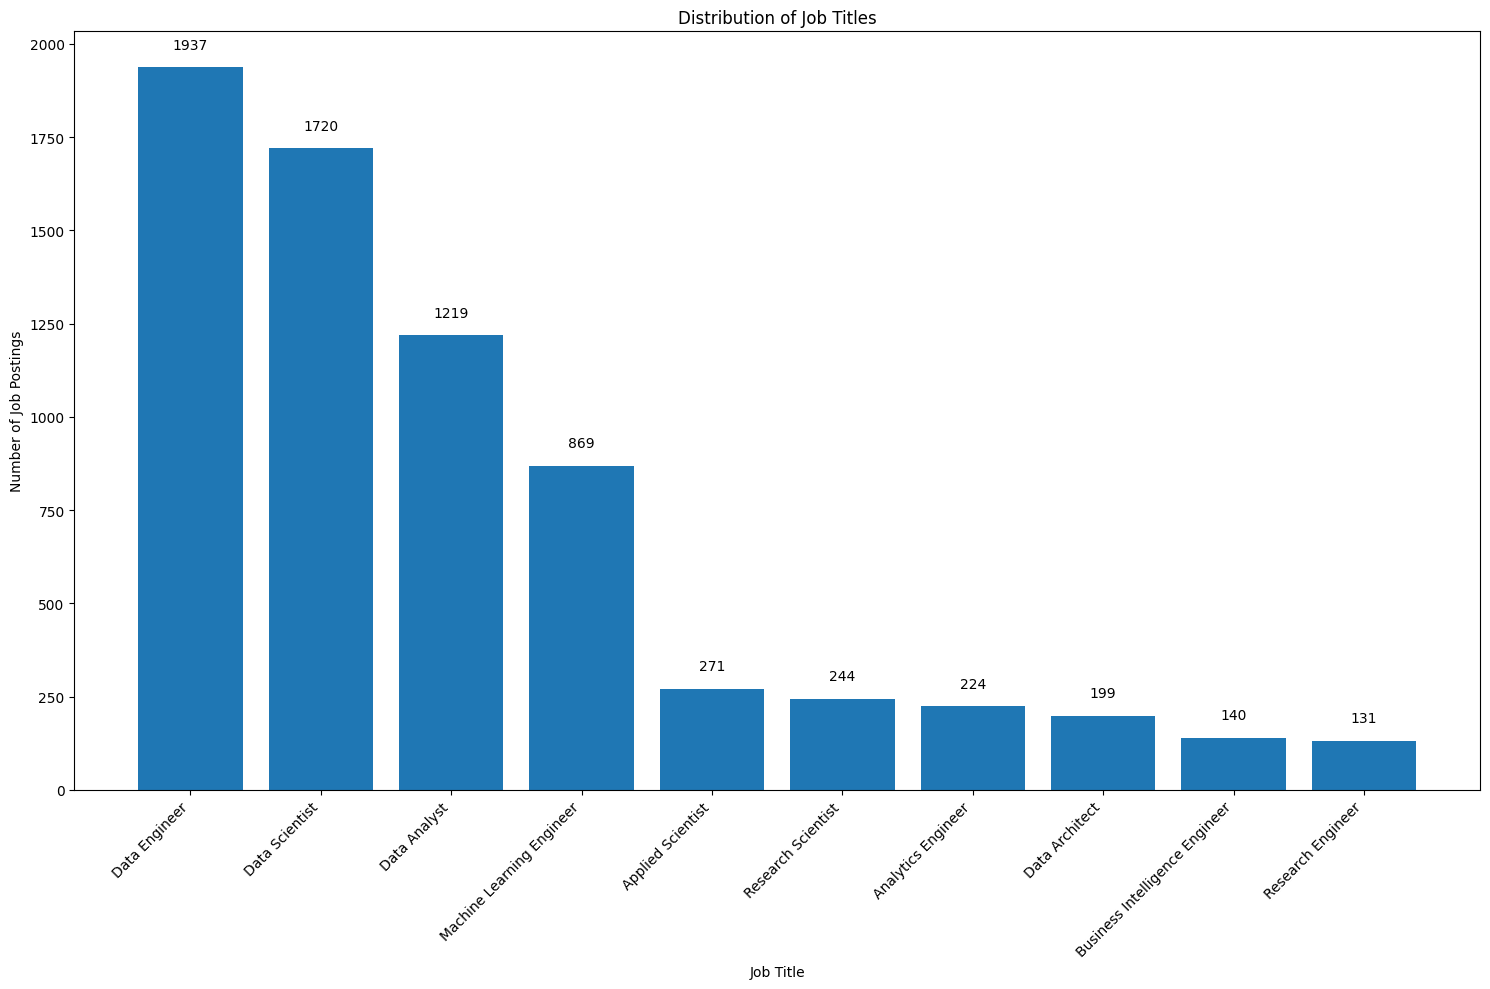

In [ ]:
# Sort job titles by count for better visualization
job_title_counts = data_us_filtered['job_title'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
bars = plt.bar(job_title_counts.index[:10], job_title_counts.values[:10])  # Top 10 most frequent titles

# Loop through bars and add text labels with count values
for bar, count in zip(bars, job_title_counts.values[:10]):
  plt.text(bar.get_x() + bar.get_width() / 2, count + 50, str(count), ha='center')  # Adjust y-offset for better positioning

plt.xlabel('Job Title')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Titles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


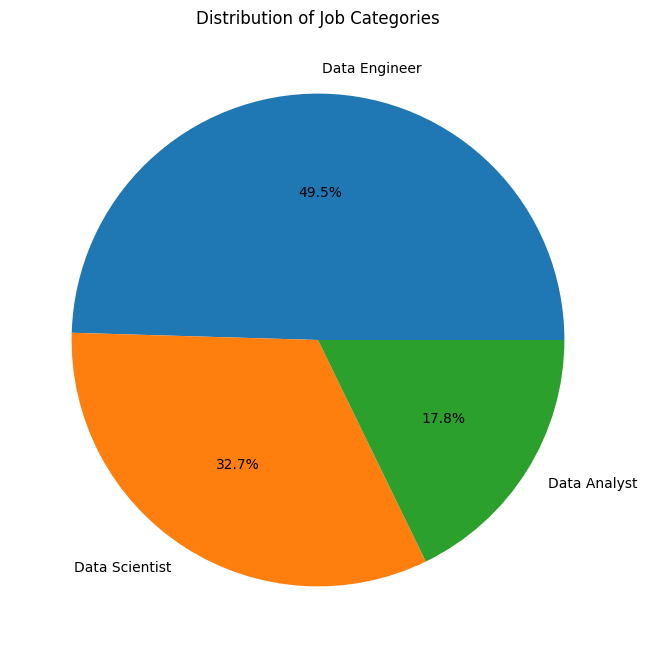

In [ ]:
job_category_counts = data_us_filtered['job_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(job_category_counts, labels=job_category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Job Categories')
plt.show()


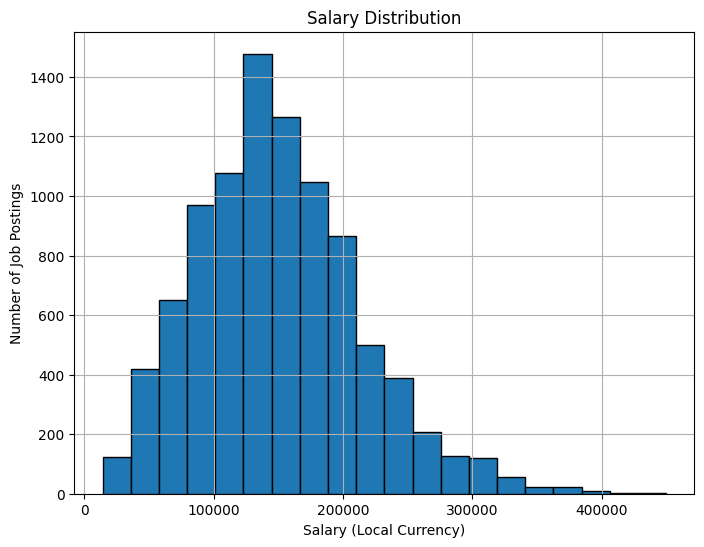

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['salary'], bins=20, edgecolor='black')  # Adjust number of bins as needed
plt.xlabel('Salary (Local Currency)')
plt.ylabel('Number of Job Postings')
plt.title('Salary Distribution')
plt.grid(True)
plt.show()


**Checking Unique Values**

In [ ]:
# Drop the specified columns
data_us_filtered.drop(['employee_residence', 'salary', 'salary_currency'], axis=1, inplace=True)

# Display the updated DataFrame
print(data_us_filtered.head())


   work_year       job_title    job_category  salary_in_usd experience_level  \
1       2023  Data Architect   Data Engineer         186000           Senior   
2       2023  Data Architect   Data Engineer          81800           Senior   
3       2023  Data Scientist  Data Scientist         212000           Senior   
4       2023  Data Scientist  Data Scientist          93300           Senior   
5       2023  Data Scientist  Data Scientist         130000           Senior   

  employment_type work_setting company_location company_size  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M  
5       Full-time       Remote    United States            M  


In [ ]:
data_us_filtered.head()

work_year       job_title    job_category  salary_in_usd experience_level  \
1       2023  Data Architect   Data Engineer         186000           Senior   
2       2023  Data Architect   Data Engineer          81800           Senior   
3       2023  Data Scientist  Data Scientist         212000           Senior   
4       2023  Data Scientist  Data Scientist          93300           Senior   
5       2023  Data Scientist  Data Scientist         130000           Senior   

  employment_type work_setting company_location company_size  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M  
5       Full-time       Remote    United States            M

In [ ]:
data_us_filtered.describe()

work_year  salary_in_usd
count  7593.000000    7593.000000
mean   2022.806927  157986.993415
std       0.436566   58196.028799
min    2020.000000   20000.000000
25%    2023.000000  118600.000000
50%    2023.000000  150000.000000
75%    2023.000000  191765.000000
max    2023.000000  450000.000000

In [ ]:
#checking for null values in the entire dataset
null_values = data_us_filtered.isnull().sum()


print(null_values)


work_year           0
job_title           0
job_category        0
salary_in_usd       0
experience_level    0
employment_type     0
work_setting        0
company_location    0
company_size        0
dtype: int64


In [ ]:
#checking for empty values in the entire dataset
empty_values = (data_us_filtered == '').sum()

print(empty_values)


work_year           0
job_title           0
job_category        0
salary_in_usd       0
experience_level    0
employment_type     0
work_setting        0
company_location    0
company_size        0
dtype: int64


In [ ]:
data_us_filtered.columns

Index(['work_year', 'job_title', 'job_category', 'salary_in_usd',
       'experience_level', 'employment_type', 'work_setting',
       'company_location', 'company_size'],
      dtype='object')

In [ ]:
data_us_filtered.employment_type.unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

In [ ]:
data_us_filtered.company_size.unique()



array(['M', 'L', 'S'], dtype=object)

In [ ]:
data_us_filtered = data_us_filtered.drop(columns=['job_title'])

data_us_filtered = data_us_filtered.drop(columns=['work_year'])


**LABEL ENCODING**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Step 2: Create a copy for label encoding
label_encoded_data = data_us_filtered.copy()

label_encoded_data.head()



job_category  salary_in_usd experience_level employment_type  \
1   Data Engineer         186000           Senior       Full-time   
2   Data Engineer          81800           Senior       Full-time   
3  Data Scientist         212000           Senior       Full-time   
4  Data Scientist          93300           Senior       Full-time   
5  Data Scientist         130000           Senior       Full-time   

  work_setting company_location company_size  
1    In-person    United States            M  
2    In-person    United States            M  
3    In-person    United States            M  
4    In-person    United States            M  
5       Remote    United States            M

In [ ]:

# Step 3: Define relevant features for label encoding
features_for_label_encoding = ["job_category", "experience_level", "employment_type", "work_setting", "company_size", 'company_location']

# Step 4: Perform label encoding for categorical features
le = LabelEncoder()
for feature in features_for_label_encoding:
    label_encoded_data[f"{feature}_encoded"] = le.fit_transform(label_encoded_data[feature])

# Step 5: Handle missing data after label encoding if needed
# For demonstration, handling NaN values in company_location_encoded column
#imputer = SimpleImputer(strategy='most_frequent')
#label_encoded_data['company_location_encoded'] = imputer.fit_transform(label_encoded_data[['company_location_encoded']])



# Check for missing values in label_encoded_data
missing_values = label_encoded_data.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Check for NaN values explicitly
nan_values = label_encoded_data.isna().sum()

# Display columns with NaN values
print("\nColumns with NaN values:")
print(nan_values[nan_values > 0])

label_encoded_data


Columns with missing values:
Series([], dtype: int64)

Columns with NaN values:
Series([], dtype: int64)


job_category  salary_in_usd experience_level employment_type  \
1      Data Engineer         186000           Senior       Full-time   
2      Data Engineer          81800           Senior       Full-time   
3     Data Scientist         212000           Senior       Full-time   
4     Data Scientist          93300           Senior       Full-time   
5     Data Scientist         130000           Senior       Full-time   
...              ...            ...              ...             ...   
9343  Data Scientist         138350        Mid-level       Full-time   
9344   Data Engineer         130800        Mid-level       Full-time   
9350   Data Engineer         165000           Senior       Full-time   
9351  Data Scientist         412000           Senior       Full-time   
9353  Data Scientist         105000      Entry-level       Full-time   

     work_setting company_location company_size  job_category_encoded  \
1       In-person    United States            M                     1   
2       In-person    United States            M                     1   
3       In-person    United States            M                     2   
4       In-person    United States            M                     2   
5          Remote    United States            M                     2   
...           ...              ...          ...                   ...   
9343       Remote    United States            M                     2   
9344       Remote    United States            M                     1   
9350       Remote    United States            L                     1   
9351       Remote    United States            L                     2   
9353       Remote    United States            S                     2   

      experience_level_encoded  employment_type_encoded  work_setting_encoded  \
1                            3                        2                     1   
2                            3                        2                     1   
3                            3                        2                     1   
4                            3                        2                     1   
5                            3                        2                     2   
...                        ...                      ...                   ...   
9343                         2                        2                     2   
9344                         2                        2                     2   
9350                         3                        2                     2   
9351                         3                        2                     2   
9353                         0                        2                     2   

      company_size_encoded  company_location_encoded  
1                        1                         0  
2                        1                         0  
3                        1                         0  
4                        1                         0  
5                        1                         0  
...                    ...                       ...  
9343                     1                         0  
9344                     1                         0  
9350                     0                         0  
9351                     0                         0  
9353                     2                         0  

[7593 rows x 13 columns]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming label_encoded_data is your complete dataset with encoded features
# Define features and target
label_encoded_features = ['job_category_encoded', 'experience_level_encoded', 'employment_type_encoded', 'work_setting_encoded', 'company_size_encoded']
#label_encoded_features = ['job_category_encoded', 'experience_level_encoded', 'work_setting_encoded']
#label_encoded_features = ['job_category_encoded']

target = "salary_in_usd"

# Apply the filter to select rows where salary is between 100,000 and 190,000
label_encoded_data = label_encoded_data[(label_encoded_data[target] >= 110000) & (label_encoded_data[target] <= 192000)]

# Step 7: Split data into training and test sets
X = label_encoded_data[label_encoded_features]
y = label_encoded_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Feature Engineering - Polynomial Features and Interactions
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Get feature names after polynomial transformation
poly_feature_names = poly.get_feature_names_out(X.columns)

# Step 9: Define models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Step 10: Fit models and evaluate
models = {
    'Linear Regression': linear_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'XGBoost': xgb_model
}

mse_scores = {}
r2_scores = {}
feature_importances = {}

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores[name] = mse
    r2_scores[name] = r2
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R^2 Score: {r2}")
    print()

    # Extract feature importance if applicable
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = model.feature_importances_
        elif hasattr(model, 'coef_'):
            feature_importances[name] = model.coef_

# Step 11: Print feature importance for tree-based models
for name, importance in feature_importances.items():
    print(f"\n{name} Feature Importance:")
    for feature, imp in zip(poly_feature_names, importance):
        print(f"{feature}: {imp:.4f}")


Linear Regression - Mean Squared Error: 5.425076110061868e+30
Linear Regression - R^2 Score: -1.043548991942822e+22

Random Forest - Mean Squared Error: 493910261.7001127
Random Forest - R^2 Score: 0.049931198658353715

Gradient Boosting - Mean Squared Error: 494280975.6292852
Gradient Boosting - R^2 Score: 0.049218106087413394

XGBoost - Mean Squared Error: 494634918.4039032
XGBoost - R^2 Score: 0.048537273932868996


Random Forest Feature Importance:
job_category_encoded: 0.0112
experience_level_encoded: 0.0141
employment_type_encoded: 0.0007
work_setting_encoded: 0.0111
company_size_encoded: 0.0131
job_category_encoded^2: 0.0142
job_category_encoded experience_level_encoded: 0.5086
job_category_encoded employment_type_encoded: 0.0156
job_category_encoded work_setting_encoded: 0.0665
job_category_encoded company_size_encoded: 0.0729
experience_level_encoded^2: 0.0141
experience_level_encoded employment_type_encoded: 0.0237
experience_level_encoded work_setting_encoded: 0.0860
experie

**ONE HOT ENCODING**

In [ ]:
data_us_filtered

job_category  salary_in_usd experience_level employment_type  \
1      Data Engineer         186000           Senior       Full-time   
2      Data Engineer          81800           Senior       Full-time   
3     Data Scientist         212000           Senior       Full-time   
4     Data Scientist          93300           Senior       Full-time   
5     Data Scientist         130000           Senior       Full-time   
...              ...            ...              ...             ...   
9343  Data Scientist         138350        Mid-level       Full-time   
9344   Data Engineer         130800        Mid-level       Full-time   
9350   Data Engineer         165000           Senior       Full-time   
9351  Data Scientist         412000           Senior       Full-time   
9353  Data Scientist         105000      Entry-level       Full-time   

     work_setting company_location company_size  
1       In-person    United States            M  
2       In-person    United States            M  
3       In-person    United States            M  
4       In-person    United States            M  
5          Remote    United States            M  
...           ...              ...          ...  
9343       Remote    United States            M  
9344       Remote    United States            M  
9350       Remote    United States            L  
9351       Remote    United States            L  
9353       Remote    United States            S  

[7593 rows x 7 columns]

**ONE HOT ENCODING METHOD**

In [ ]:
# Step 1: Import necessary libraries and modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and preprocessed your data as 'data_us_filtered'
onehot_encoded_data = data_us_filtered.copy()

# Step 3: Define features and target
features = ["job_category", "experience_level", "employment_type", "work_setting", "company_size", 'company_location']

target = 'salary_in_usd'

# Apply the filter to select rows where salary is between 100,000 and 190,000
onehot_encoded_data = onehot_encoded_data[(onehot_encoded_data[target] >= 100000) & (onehot_encoded_data[target] <= 190000)]

# Step 4: Perform one-hot encoding using pandas
encoded_data = pd.get_dummies(onehot_encoded_data, columns=features, drop_first=True)

# Step 5: Split the data into features and target
X = encoded_data.drop('salary_in_usd', axis=1)
y = encoded_data['salary_in_usd']

# Step 6: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Check for NaN values in y_test
print("Number of NaN values in y_test:")
print(y_test.isnull().sum())

# Step 8: Handle NaN values in y_test if present (if not, skip this step)
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# Step 9: Define models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Step 10: Fit models and evaluate
models = {
    'Linear Regression': linear_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'XGBoost': xgb_model
}

mse_scores = {}
r2_scores = {}
feature_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train_imputed)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test_imputed, y_pred)
    r2 = r2_score(y_test_imputed, y_pred)
    mse_scores[name] = mse
    r2_scores[name] = r2
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R^2 Score: {r2}")
    print()

    # Extract feature importance if applicable
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = model.feature_importances_
        elif hasattr(model, 'coef_'):
            feature_importances[name] = model.coef_

# Step 11: Print feature importance for tree-based models
for name, importance in feature_importances.items():
    print(f"\n{name} Feature Importance:")
    for feature, imp in zip(X.columns, importance):
        print(f"{feature}: {imp:.4f}")


Number of NaN values in y_test:
0
Linear Regression - Mean Squared Error: 571863970.3747758
Linear Regression - R^2 Score: 0.0672446361025022

Random Forest - Mean Squared Error: 570487805.8535924
Random Forest - R^2 Score: 0.0694892692761887

Gradient Boosting - Mean Squared Error: 575092197.5419917
Gradient Boosting - R^2 Score: 0.061979142275138344

XGBoost - Mean Squared Error: 572494395.4546853
XGBoost - R^2 Score: 0.06621636293740718


Random Forest Feature Importance:
job_category_Data Engineer: 0.2879
job_category_Data Scientist: 0.1830
experience_level_Executive: 0.0375
experience_level_Mid-level: 0.0838
experience_level_Senior: 0.1798
employment_type_Freelance: 0.0035
employment_type_Full-time: 0.0052
employment_type_Part-time: 0.0003
work_setting_In-person: 0.0491
work_setting_Remote: 0.0539
company_size_M: 0.0950
company_size_S: 0.0211

Gradient Boosting Feature Importance:
job_category_Data Engineer: 0.3229
job_category_Data Scientist: 0.2119
experience_level_Executive: 0.